Student: Satish Byrow

#**1. Goal**
We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?er?

#**2. Import and Loading**

## Load Libraries & Functions

In [14]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


## Load Data

In [2]:
# Open saved file and preview again
df_main = pd.read_csv("Data/insurance.csv", low_memory = False)
df_main.info()
#Make a copy
df = df_main


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Clean the Data

In [22]:
#Duplicate count
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [20]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [21]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


In [5]:
#Check for categorical descrepencies
for col in df.select_dtypes(include='object').columns:
  print(df[col].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [6]:
#Display top 5
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Q1: Do smokers have higher insurance charges than non-smokers?
- Null Hyposthesis Smoker do not have a higher insurance charge than non-smokers
- Alternative Hyposthesis Smoker do have a higher insurance charge than non-smokers

Q2: Select the correct test according to the data type and number of samples
Data Type - Numerical and 2 Sample test

In [23]:
#Visualise data
df['smoker'].value_counts(1)

no     0.795064
yes    0.204936
Name: smoker, dtype: float64

<Axes: xlabel='smoker', ylabel='count'>

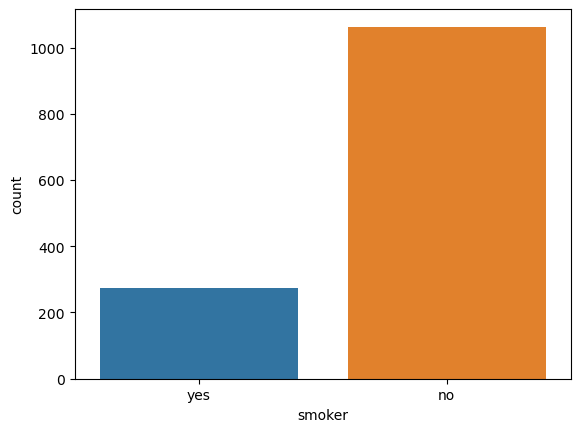

In [24]:
#Visualise smoker count
sns.countplot(data=df,x='smoker')

<Axes: xlabel='charges', ylabel='Density'>

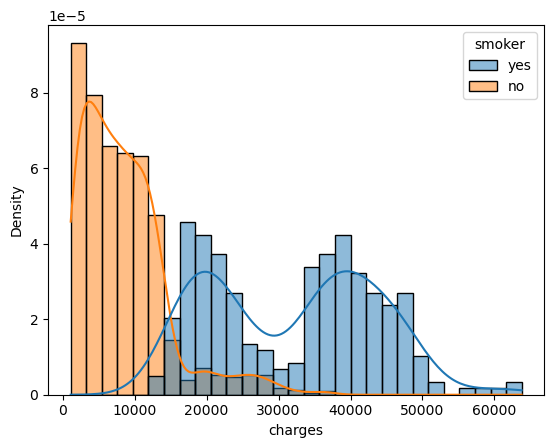

In [25]:
## visualize the histogram of charges, but separate it by "smoker"
sns.histplot(data=df, x='charges',hue='smoker',common_norm=False, 
             stat='density',kde=True)

In [26]:
## Separate the 2 groups into 2 variables
grp_yes = df.loc[df['smoker']=="yes", 'charges']
grp_no = df.loc[df['smoker']=="no", 'charges']

display(grp_yes.head(), grp_no.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

Q3: Assumptions
- Since we are comparing a numeric measurement between 2 groups, we want to run a 2-sample (AKA independent T-test).

- The Assumptions are:
    - No significant outliers
    - Normality 
    - Equal Variiance

## Assumption: No significant outliers

In [27]:
#Q3: Test the assumptions of your selected test.
#Apply the Z-score rule
## check yes group for outliers using z-score >3 rule.
outliers_yes = np.abs(stats.zscore(grp_yes))>3
outliers_yes.sum()

0

In [28]:
## check no group for outliers using z-score >3 rule.
outliers_no = np.abs(stats.zscore(grp_no))>3
outliers_no.sum()

24

** Interpretation **
Outliers found in no group therefore Assumption is incorrect/no met

## Assumption: Normally distributed groups

In [29]:
## use normaltest to check if yes group is normally distributed
stats.normaltest(grp_yes)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [30]:
## use normaltest to check if no group is normally distributed
stats.normaltest(grp_no)

NormaltestResult(statistic=316.23579659917766, pvalue=2.1392881146814186e-69)

In [ ]:
** Interpretation **
Not normally distributed

## Assumption: Equal variance

In [31]:
## use Levene's test to check if groups have equal variance
stats.levene(grp_yes, grp_no)

LeveneResult(statistic=332.47137394800666, pvalue=1.670117565125241e-66)

** Interpretation **
Equal variance failed

In [14]:
#drop measurements
df = df.drop(columns=['Measurements'])
df.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0


In [15]:
#Split Hero|Plublisher
df[['Hero','Publisher']] = df['Hero|Publisher'].str.split('|',expand=True)
df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Height,Weight,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,203.0,441.0,A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,191.0,65.0,Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,185.0,90.0,Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,203.0,441.0,Abomination,Marvel Comics
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,193.0,122.0,Absorbing Man,Marvel Comics


In [16]:
#Set column order
df = df.drop(columns=['Hero|Publisher'])
df = df[['Hero', 'Publisher', 'Gender', 'Eye color','Race','Hair color','Height', 'Skin color','Alignment','Weight']]
df.head()

,Hero,Publisher,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight
0,A-Bomb,Marvel Comics,Male,yellow,Human,No Hair,203.0,Unknown,good,441.0
1,Abe Sapien,Dark Horse Comics,Male,blue,Icthyo Sapien,No Hair,191.0,blue,good,65.0
2,Abin Sur,DC Comics,Male,blue,Ungaran,No Hair,185.0,red,good,90.0
3,Abomination,Marvel Comics,Male,green,Human / Radiation,No Hair,203.0,Unknown,bad,441.0
4,Absorbing Man,Marvel Comics,Male,blue,Human,No Hair,193.0,Unknown,bad,122.0


In [17]:
#Check for categorical descrepencies
for col in df1.select_dtypes(include='object').columns:
  print(df1[col].value_counts())

3-D Man            1
Namora             1
Naruto Uzumaki     1
Nathan Petrelli    1
Nebula             1
                  ..
Evilhawk           1
Exodus             1
Fabian Cortez      1
Falcon             1
Zoom               1
Name: hero_names, Length: 667, dtype: int64
Intelligence                                                                                                                                                                                                                                                         8
Durability,Super Strength                                                                                                                                                                                                                                            5
Agility,Stealth,Marksmanship,Weapons Master,Stamina                                                                                                                                                    

In [18]:
#Split the values
powers_split = df1['Powers'].str.split(",")
powers_split

0        [Agility, Super Strength, Stamina, Super Speed]
1      [Accelerated Healing, Durability, Longevity, S...
2      [Agility, Accelerated Healing, Cold Resistance...
3                                   [Lantern Power Ring]
4      [Accelerated Healing, Intelligence, Super Stre...
                             ...                        
662               [Flight, Energy Blasts, Size Changing]
663    [Cold Resistance, Durability, Longevity, Super...
664    [Agility, Stealth, Danger Sense, Marksmanship,...
665    [Cryokinesis, Telepathy, Magic, Fire Control, ...
666    [Super Speed, Intangibility, Time Travel, Time...
Name: Powers, Length: 667, dtype: object

In [19]:
# create list of powers
new_df = pd.concat([df1.drop('Powers', 1), df1['Powers'].str.get_dummies(sep=",")], 1)
print(new_df)

          hero_names  Accelerated Healing  Adaptation  Agility  \
0            3-D Man                    0           0        1   
1             A-Bomb                    1           0        0   
2         Abe Sapien                    1           0        1   
3           Abin Sur                    0           0        0   
4        Abomination                    1           0        0   
..               ...                  ...         ...      ...   
662  Yellowjacket II                    0           0        0   
663             Ymir                    0           0        0   
664             Yoda                    0           0        1   
665          Zatanna                    0           0        0   
666             Zoom                    0           0        0   

     Animal Attributes  Animal Control  Animal Oriented Powers  Animation  \
0                    0               0                       0          0   
1                    0               0               

C:\Users\sbyrow\AppData\Local\Temp\ipykernel_5072\996008099.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  new_df = pd.concat([df1.drop('Powers', 1), df1['Powers'].str.get_dummies(sep=",")], 1)
C:\Users\sbyrow\AppData\Local\Temp\ipykernel_5072\996008099.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  new_df = pd.concat([df1.drop('Powers', 1), df1['Powers'].str.get_dummies(sep=",")], 1)


In [26]:
#Rename column
new_df.rename(columns={'hero_names': 'Hero'}, inplace=True)
new_df.head()

,Hero,Accelerated Healing,Adaptation,Agility,Animal Attributes,Animal Control,Animal Oriented Powers,Animation,Anti-Gravity,Astral Projection,...,Vision - Thermal,Vision - X-Ray,Vitakinesis,Wallcrawling,Water Control,Weapon-based Powers,Weapons Master,Weather Control,Web Creation,Wind Control
0,3-D Man,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A-Bomb,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abe Sapien,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,Abin Sur,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abomination,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Combine Data

In [27]:
#Combine the data sets
df_main = pd.concat([df, new_df], axis = 1)
df_main.head(30)

,Hero,Publisher,Gender,Eye color,Race,Hair color,Height,Skin color,Alignment,Weight,...,Vision - Thermal,Vision - X-Ray,Vitakinesis,Wallcrawling,Water Control,Weapon-based Powers,Weapons Master,Weather Control,Web Creation,Wind Control
0,A-Bomb,Marvel Comics,Male,yellow,Human,No Hair,203.0,Unknown,good,441.0,...,0,0,0,0,0,0,0,0,0,0
1,Abe Sapien,Dark Horse Comics,Male,blue,Icthyo Sapien,No Hair,191.0,blue,good,65.0,...,0,0,0,0,0,0,0,0,0,0
2,Abin Sur,DC Comics,Male,blue,Ungaran,No Hair,185.0,red,good,90.0,...,0,0,0,0,0,0,1,0,0,0
3,Abomination,Marvel Comics,Male,green,Human / Radiation,No Hair,203.0,Unknown,bad,441.0,...,0,0,0,0,0,0,0,0,0,0
4,Absorbing Man,Marvel Comics,Male,blue,Human,No Hair,193.0,Unknown,bad,122.0,...,0,0,0,0,0,0,0,0,0,0
5,Adam Strange,DC Comics,Male,blue,Human,Blond,185.0,Unknown,good,88.0,...,0,0,0,0,0,0,0,0,0,0
6,Agent Bob,Marvel Comics,Male,brown,Human,Brown,178.0,Unknown,good,81.0,...,0,0,0,0,0,0,0,0,0,0
7,Agent Zero,Marvel Comics,Male,Unknown,Unknown,Unknown,191.0,Unknown,good,104.0,...,0,0,0,0,0,0,0,0,0,0
8,Air-Walker,Marvel Comics,Male,blue,Unknown,White,188.0,Unknown,bad,108.0,...,0,0,0,0,0,0,1,0,0,0
9,Ajax,Marvel Comics,Male,brown,Cyborg,Black,193.0,Unknown,bad,90.0,...,0,0,0,0,0,0,0,0,0,0


## Explore the Data

In [29]:
#Compare the average weight of super powers who have Super Speed to those who do not.
#df_main.groupby('Hero').contains('Super Speed')['Weight'].mean()
df_main.groupby('Super Speed')['Weight'].mean()

Super Speed
0    113.705479
1    113.391813
Name: Weight, dtype: float64

In [30]:
#What is the average height of heroes for each publisher?
df_main.groupby('Publisher')['Height'].mean()

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float64